***
# **<p style="text-align: center;">LAB 1: Computational Statistics</p>**
### <p style="text-align: center;">- Emilio PICARD -</p>

***
.

In [ ]:
%load_ext autoreload
%autoreload 2

In [54]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

## **Question 1**

In [55]:
from funcs import sgd, random_samples

##  **Question 2**

In [56]:
n = 100
d = 2

X = random_samples(n, d)

In [57]:
w = np.array([-1/2, 1/2])

dot_product = np.dot(X, w)
y = np.where(dot_product >= 0, 1, -1)
Z = np.column_stack((X, y))

Z_neg = Z[np.where(Z[:,2] == -1)][:, :2]
Z_pos = Z[np.where(Z[:,2] == 1)][:, :2]

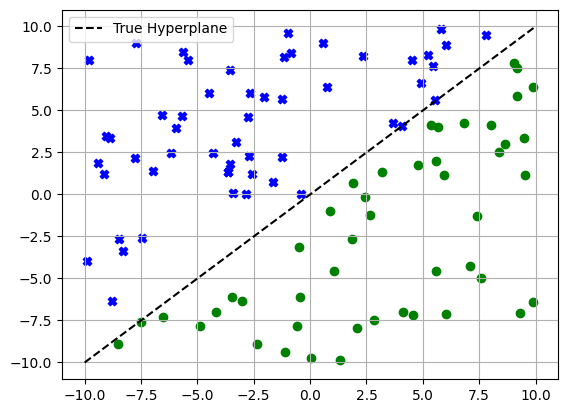

In [58]:
x_vals = np.linspace(-10, 10, 10)
y_vals = -(w[0] * x_vals) / w[1]

fig = plt.figure()
plt.scatter(Z_neg[:, 0], Z_neg[:, 1], marker='o', color='green')
plt.scatter(Z_pos[:, 0], Z_pos[:, 1], marker='X', color='blue')
plt.plot(x_vals, y_vals, '--', color='black', label='True Hyperplane')
plt.grid()
plt.legend()
plt.show()

## **Question 3:**

In [65]:
w_star = sgd(X=X, y=y, w_init=np.random.rand(2), lr=0.001)
print(f'w_star: {w_star}')

w_star: [-0.10708022  0.12633649]


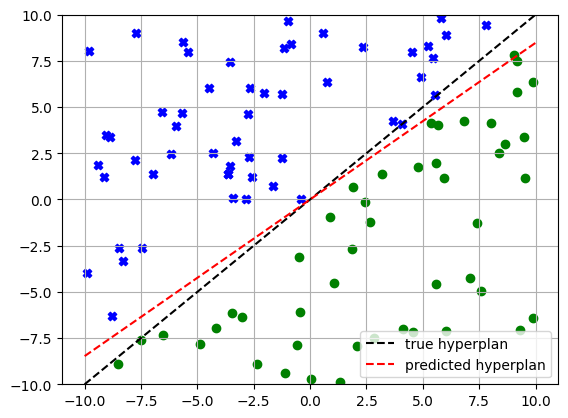

In [66]:
x_vals = np.linspace(-10, 10, 100)

y_vals = -(w_star[0] * x_vals) / w_star[1]
y_val_true = -(w[0] * x_vals) / w[1]

fig = plt.figure()
plt.scatter(Z_neg[:, 0], Z_neg[:, 1], marker='o', color='green')
plt.scatter(Z_pos[:, 0], Z_pos[:, 1], marker='X', color='blue')
plt.plot(x_vals, y_val_true, '--', color='black', label='true hyperplan')
plt.plot(x_vals, y_vals, '--', color='red', label='predicted hyperplan')
plt.ylim(-10, 10)
plt.legend()
plt.grid()
plt.show()

## **Question 4:**

w_star_noisy: [-0.09681651  0.12525575]


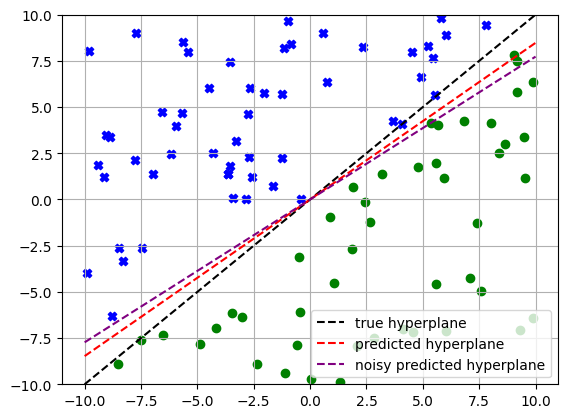

In [67]:
# Gaussian noise to the observations
noise_x = np.random.normal(0, 0.5, size=X.shape)
X_noisy = X + noise_x

w_star_noisy = sgd(X=X_noisy, y=y, w_init=np.random.rand(2), lr=0.001)
print(f'w_star_noisy: {w_star_noisy}')

# Plot the results
y_vals_noisy = -(w_star_noisy[0] * x_vals) / w_star_noisy[1]

fig = plt.figure()
plt.scatter(Z_neg[:, 0], Z_neg[:, 1], marker='o', color='green')
plt.scatter(Z_pos[:, 0], Z_pos[:, 1], marker='X', color='blue')
plt.plot(x_vals, y_val_true, '--', color='black', label='true hyperplane')
plt.plot(x_vals, y_vals, '--', color='red', label='predicted hyperplane')
plt.plot(x_vals, y_vals_noisy, '--', color='purple', label='noisy predicted hyperplane')
plt.ylim(-10, 10)
plt.legend()
plt.grid()
plt.show()

In [73]:
# compute accuracy with noisy data
y_pred = np.sign(np.dot(X_noisy, w_star_noisy))
accuracy = np.mean(y == y_pred)
print(f'Accuracy of noisy data on the train set: {accuracy}%')

Accuracy of noisy data on the train set: 0.97%


## **Question 5:**

In [74]:
import pandas as pd

# load X
with open('./wdbc.data') as f:
    lines = f.readlines()

df = pd.DataFrame([line.strip().split(',') for line in lines])

In [75]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
2,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
4,84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,...,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678


**Standardization**: I will standardized the `X` data using `StandardScaler`, which ensures that each feature has a mean of 0 and a standard deviation of 1. I used this common approach in preprocessing the data because it usually leads to better results.

In [76]:
from sklearn.preprocessing import StandardScaler

y_labels = df[1]
X = df.iloc[:, 2:]
X = X.to_numpy().astype(float)

scaler = StandardScaler()
X = scaler.fit_transform(X)

y_labels = y_labels.replace('M', 1)
y_labels = y_labels.replace('B', -1)
y  = y_labels.to_numpy()

/tmp/ipykernel_41204/137978586.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_labels = y_labels.replace('B', -1)


In [77]:
n, d = X.shape
num_classes = len(np.unique(y))

w_star = sgd(X=X, y=y, w_init=np.random.rand(d), lr=0.001, iters=1000)

In [78]:
# Predict labels
y_pred = np.sign(np.dot(X, w_star))

# Compute  accuracy
accuracy = np.mean(y == y_pred)
print(f'Accuracy on the train dataset: {accuracy}%')

Accuracy on the train dataset: 0.9279437609841827%


**Accuracy**: After few runs, the accuracy on training data is approximately 92%, which indicates that the model is performing well in classifying the data.

Overall, the model appears to be effective in classifying the data.